In [ ]:
import sys
sys.path.append('structural_bloc_diag_utils')

Mounted at /content/drive


In [ ]:
from BlocDiagModel import BlocDiagModel
from bloc_diag_utils import translate_nonzero_blocks, train_and_test_evaluate, train_and_val_evaluate, evaluate_model_accuracy

In [ ]:
import copy
import datetime
import json
import os
import pytz
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torchvision
from torch.utils.data import DataLoader

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
train_MNIST = torchvision.datasets.MNIST(root="/tmp", train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_MNIST = torchvision.datasets.MNIST(root="/tmp", train=False, transform=torchvision.transforms.ToTensor(), download=True)

train_fashion_MNIST = torchvision.datasets.FashionMNIST(root="/tmp", train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_fashion_MNIST = torchvision.datasets.FashionMNIST(root="/tmp", train=False, transform=torchvision.transforms.ToTensor(), download=True)

train_Kuzushiji_MNIST = torchvision.datasets.KMNIST(root="/tmp", train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_Kuzushiji_MNIST = torchvision.datasets.KMNIST(root="/tmp", train=False, transform=torchvision.transforms.ToTensor(), download=True)

# train and validation

In [ ]:
with open('./bloc_diag_configs/bloc_diag_dataset=Kuzushiji-MNIST/train_val_configs__dataset=Kuzushiji-MNIST_bias=False_nonlinearity=SiLU__every_layer_except_last.json', 'r') as file:
    train_and_val_configs = json.load(file)

config_list = list(train_and_val_configs.values())

In [ ]:
for config in config_list:
  print(config)

{'model_name': 'bloc_diag_model', 'dataset': 'Kuzushiji-MNIST', 'layer_sizes': [784, 100, 100, 10, 10], 'config_name': 'config0', 'nonzero_blocks': '[100]*1 | [784]*1, [100]*1 | [100]*1, [10]*1 | [100]*1, [10]*1 | [10]*1', 'if_bias': False, 'nonlinear_activation': 'SiLU__every_layer_except_last', 'learning_rate': 0.01, 'scheduler_step_size': 20, 'scheduler_gamma': 0.5, 'train_loader_batch_size': 64, 'stopping_epoch': 100, 'multiplier_off_diag_loss': [0.0]}
{'model_name': 'bloc_diag_model', 'dataset': 'Kuzushiji-MNIST', 'layer_sizes': [784, 100, 100, 10, 10], 'config_name': 'config1', 'nonzero_blocks': '[1]*100 | [7]*16+[8]*84, [1]*100 | [1]*100, [1]*10 | [10]*10, [1]*10 | [1]*10', 'if_bias': False, 'nonlinear_activation': 'SiLU__every_layer_except_last', 'learning_rate': 0.01, 'scheduler_step_size': 20, 'scheduler_gamma': 0.5, 'train_loader_batch_size': 64, 'stopping_epoch': 100, 'multiplier_off_diag_loss': [4.0, 7.0, 10.0, 20.0]}
{'model_name': 'bloc_diag_model', 'dataset': 'Kuzushiji

config_name = config14
multiplier_off_diag_loss = 7.0
Epoch 5/100 - Train loss: 659.0891, Train accuracy: 63.98%
Validation accuracy, before dropping off diagonal entries: 62.56%
Validation accuracy, after dropping off diagonal entries: 62.86%
Epoch 10/100 - Train loss: 651.8633, Train accuracy: 65.82%
Validation accuracy, before dropping off diagonal entries: 64.80%
Validation accuracy, after dropping off diagonal entries: 64.91%
Epoch 15/100 - Train loss: 650.8069, Train accuracy: 66.60%
Validation accuracy, before dropping off diagonal entries: 65.02%
Validation accuracy, after dropping off diagonal entries: 65.04%
Epoch 20/100 - Train loss: 648.8782, Train accuracy: 66.82%
Validation accuracy, before dropping off diagonal entries: 65.44%
Validation accuracy, after dropping off diagonal entries: 65.50%
Epoch 25/100 - Train loss: 325.8080, Train accuracy: 67.95%
Validation accuracy, before dropping off diagonal entries: 66.34%
Validation accuracy, after dropping off diagonal entries:

<Figure size 640x480 with 0 Axes>

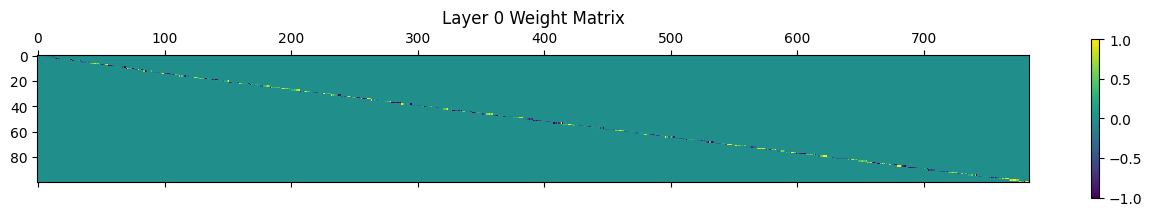

<Figure size 640x480 with 0 Axes>

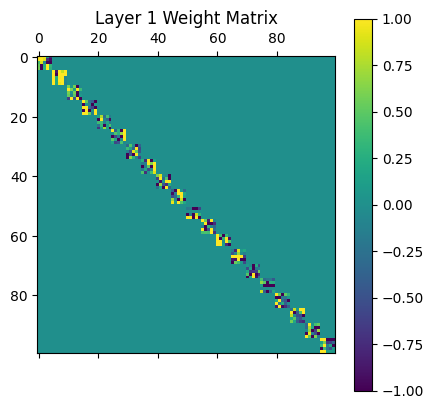

<Figure size 640x480 with 0 Axes>

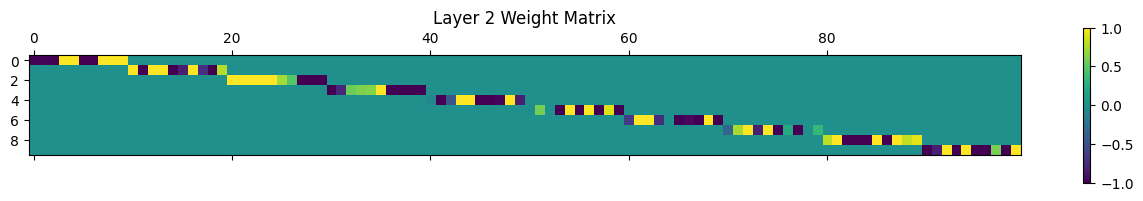

<Figure size 640x480 with 0 Axes>

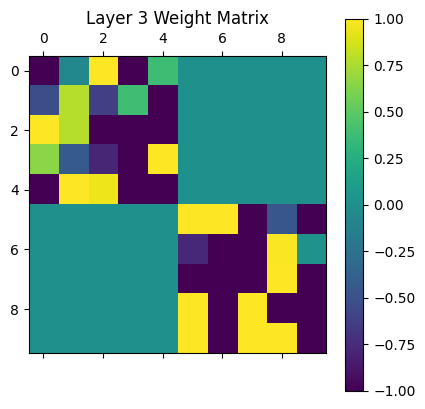

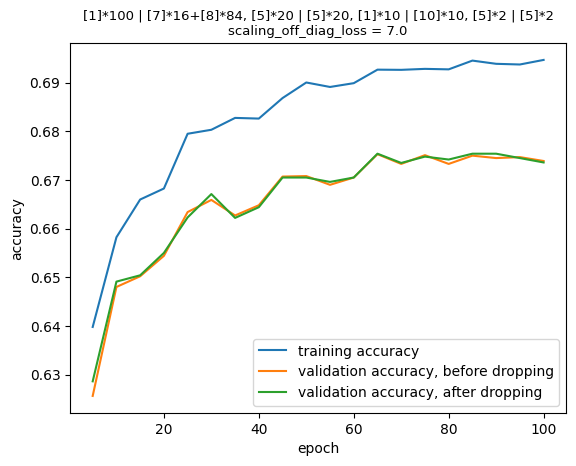

Time consumption: 1054.0159096717834
config_name = config14
multiplier_off_diag_loss = 10.0
Epoch 5/100 - Train loss: 952.5632, Train accuracy: 61.66%
Validation accuracy, before dropping off diagonal entries: 60.17%
Validation accuracy, after dropping off diagonal entries: 60.34%
Epoch 10/100 - Train loss: 938.9579, Train accuracy: 62.82%
Validation accuracy, before dropping off diagonal entries: 61.51%
Validation accuracy, after dropping off diagonal entries: 61.71%
Epoch 15/100 - Train loss: 935.3939, Train accuracy: 63.31%
Validation accuracy, before dropping off diagonal entries: 62.18%
Validation accuracy, after dropping off diagonal entries: 61.92%
Epoch 20/100 - Train loss: 932.6368, Train accuracy: 63.75%
Validation accuracy, before dropping off diagonal entries: 62.26%
Validation accuracy, after dropping off diagonal entries: 62.16%
Epoch 25/100 - Train loss: 466.9144, Train accuracy: 64.65%
Validation accuracy, before dropping off diagonal entries: 63.25%
Validation accuracy

<Figure size 640x480 with 0 Axes>

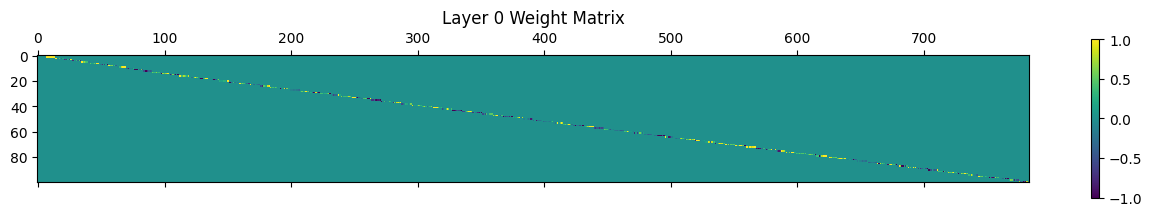

<Figure size 640x480 with 0 Axes>

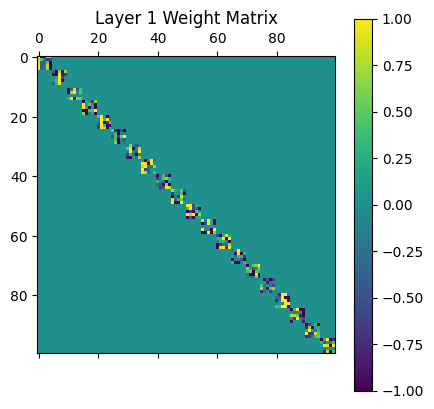

<Figure size 640x480 with 0 Axes>

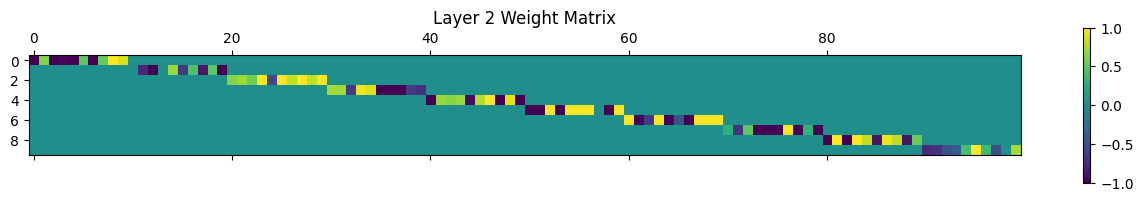

<Figure size 640x480 with 0 Axes>

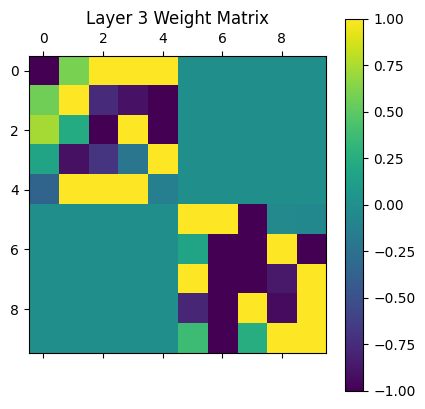

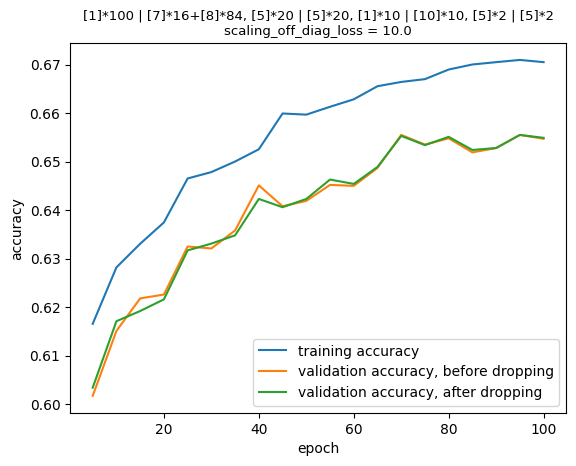

Time consumption: 1055.9263663291931
config_name = config14
multiplier_off_diag_loss = 20.0
Epoch 5/100 - Train loss: 1980.9245, Train accuracy: 60.84%
Validation accuracy, before dropping off diagonal entries: 59.83%
Validation accuracy, after dropping off diagonal entries: 60.04%
Epoch 10/100 - Train loss: 1935.7614, Train accuracy: 62.20%
Validation accuracy, before dropping off diagonal entries: 62.06%
Validation accuracy, after dropping off diagonal entries: 62.13%
Epoch 15/100 - Train loss: 1920.1061, Train accuracy: 62.99%
Validation accuracy, before dropping off diagonal entries: 62.29%
Validation accuracy, after dropping off diagonal entries: 62.32%
Epoch 20/100 - Train loss: 1913.9199, Train accuracy: 63.48%
Validation accuracy, before dropping off diagonal entries: 62.69%
Validation accuracy, after dropping off diagonal entries: 62.49%
Epoch 25/100 - Train loss: 948.1941, Train accuracy: 64.27%
Validation accuracy, before dropping off diagonal entries: 63.44%
Validation accu

<Figure size 640x480 with 0 Axes>

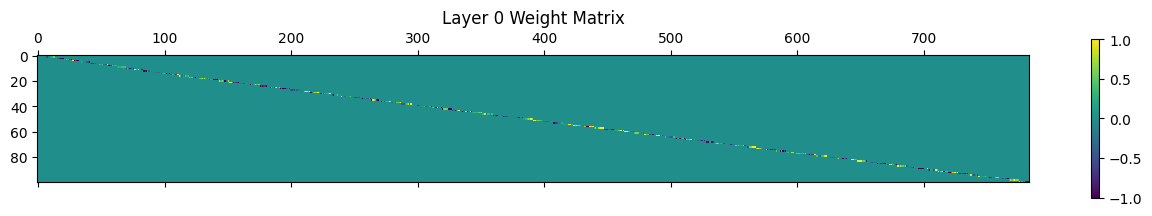

<Figure size 640x480 with 0 Axes>

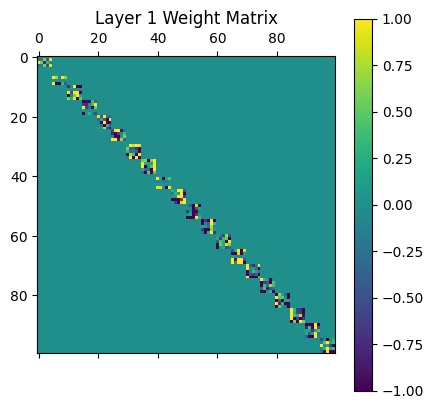

<Figure size 640x480 with 0 Axes>

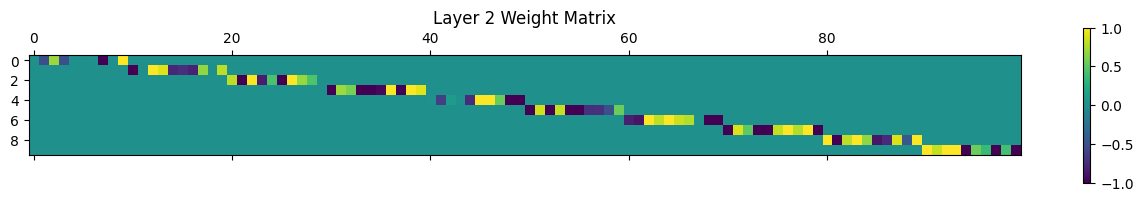

<Figure size 640x480 with 0 Axes>

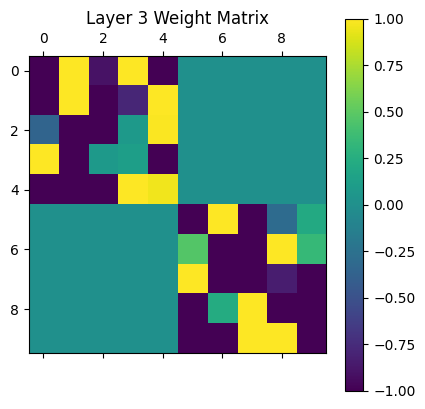

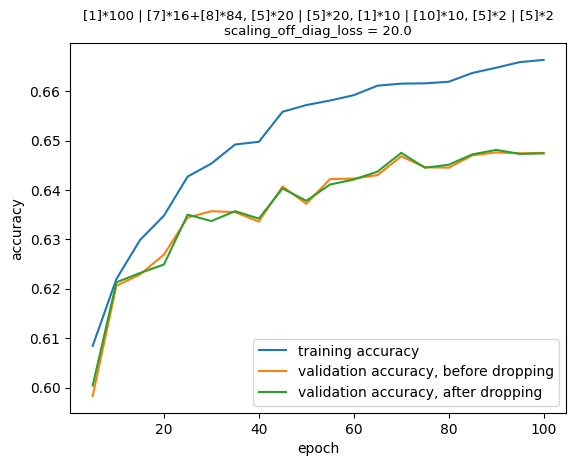

Time consumption: 1056.6398079395294


In [ ]:
rand_seed = 42
EST_time_zone = pytz.timezone('US/Eastern')


for config in config_list:
  fig_folder_dir = f"./bloc_diag_results/bloc_diag_dataset={config['dataset']}/train_val_figs__dataset={config['dataset']}_bias={config['if_bias']}_nonlinearity={config['nonlinear_activation']}"
  os.makedirs(fig_folder_dir, exist_ok=True) # create the directory if it doesn't exist
  df_folder_dir = f"./bloc_diag_results/bloc_diag_dataset={config['dataset']}"
  df_path = os.path.join(df_folder_dir, \
        f"train_val_results__dataset={config['dataset']}_bias={config['if_bias']}_nonlinearity={config['nonlinear_activation']}.csv")
  if os.path.exists(df_path):
    df_results = pd.read_csv(df_path)
  else:
    df_results = pd.DataFrame()


  if config['dataset'] == 'MNIST':
    train_data, val_data = torch.utils.data.random_split(
      train_MNIST, [50000, 10000], generator=torch.Generator().manual_seed(rand_seed))
  elif config['dataset'] == 'fashion-MNIST':
    train_data, val_data = torch.utils.data.random_split(
      train_fashion_MNIST, [50000, 10000], generator=torch.Generator().manual_seed(rand_seed))
  elif config['dataset'] == 'Kuzushiji-MNIST':
    train_data, val_data = torch.utils.data.random_split(
      train_Kuzushiji_MNIST, [50000, 10000], generator=torch.Generator().manual_seed(rand_seed))
  else:
    raise ValueError("Unknown dataset name")



  torch.manual_seed(rand_seed)
  np.random.seed(rand_seed)

  for lambda_off_diag_loss in config['multiplier_off_diag_loss']:
    print(f"config_name = {config['config_name']}")
    print(f"multiplier_off_diag_loss = {lambda_off_diag_loss}")
    t_start = time.time()

    row_blocks, col_blocks = translate_nonzero_blocks(config['nonzero_blocks'])
    # DataLoaders for train and validation datasets
    train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=config['train_loader_batch_size'])
    val_loader = DataLoader(dataset=val_data, shuffle=False, batch_size=1000)

    model = BlocDiagModel(config['layer_sizes'], row_blocks, col_blocks, config['if_bias'], config['nonlinear_activation']).to(device)
    n_epochs, train_accuracies, val_accuracies_before_dropping, val_accuracies_off_diag_dropped = \
      train_and_val_evaluate(model, train_loader, val_loader, \
                  config['stopping_epoch'], \
                  config['learning_rate'], \
                  lambda_off_diag_loss, \
                  config['scheduler_step_size'],
                  config['scheduler_gamma'])

    current_time_est = datetime.datetime.now(EST_time_zone)
    time_str = current_time_est.strftime("%Y-%m-%d_%H-%M-%S")


    ### prepare dict to save to df_results
    dict_to_save = copy.deepcopy(config)
    _ = dict_to_save.pop('multiplier_off_diag_loss', None) # this is a list, need to remove and append the current value
    dict_to_save['multiplier_off_diag_loss'] = lambda_off_diag_loss

    dict_to_save['random_seed'] = rand_seed
    dict_to_save['time'] = time_str
    dict_to_save['n_epochs'] = n_epochs
    dict_to_save['train_accuracies'] = train_accuracies
    dict_to_save['val_accuracies_before_dropping'] = val_accuracies_before_dropping
    dict_to_save['val_accuracies_off_diag_dropped'] = val_accuracies_off_diag_dropped
    # save result to spreadsheet
    df_results = pd.concat([df_results, pd.DataFrame([dict_to_save])], ignore_index=True)
    df_results.to_csv(df_path, index=False)



    ####### plot the weight matrices
    model_off_diag_dropped = model.copy_model_drop_off_diag()
    for layer_idx in range(len(config['layer_sizes']) - 1):
        matrix_weight = dict(model_off_diag_dropped.named_parameters())[f'layers.{layer_idx}.weight']
        matrix_weight = matrix_weight.detach().numpy()
        plt.figure()
        plt.matshow(matrix_weight)
        plt.colorbar()
        plt.clim(-1,1)
        plt.title(f"Layer {layer_idx} Weight Matrix")

    ####### plot accuracy vs. n_epochs
    n_epochs = [x + 1 for x in n_epochs]
    plt.figure()
    plt.plot(n_epochs, train_accuracies, label='training accuracy')
    plt.plot(n_epochs, val_accuracies_before_dropping, label='validation accuracy, before dropping')
    plt.plot(n_epochs, val_accuracies_off_diag_dropped, label='validation accuracy, after dropping')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.title(f"{config['nonzero_blocks']}\nscaling_off_diag_loss = {lambda_off_diag_loss}", fontsize=9.5)

    fig_name = f"{config['config_name']}_multiplier_odloss={lambda_off_diag_loss}_dataset={config['dataset']}_bias={config['if_bias']}_nonlinearity={config['nonlinear_activation']}.png"
    fig_path = os.path.join(fig_folder_dir, fig_name)
    plt.savefig(fig_path)
    plt.show()


    # Time consumed
    t_end = time.time()
    print(f'Time consumption: {t_end - t_start}')

# test

In [ ]:
with open('./bloc_diag_configs/bloc_diag_dataset=MNIST/test_configs__dataset=MNIST_bias=False_nonlinearity=SiLU__every_layer_except_last.json', 'r') as file:
    train_and_val_configs = json.load(file)

config_list = list(train_and_val_configs.values())

In [ ]:
for config in config_list:
  print(config)

{'model_name': 'bloc_diag_model', 'dataset': 'MNIST', 'layer_sizes': [784, 100, 100, 10, 10], 'config_name': 'config0', 'nonzero_blocks': '[100]*1 | [784]*1, [100]*1 | [100]*1, [10]*1 | [100]*1, [10]*1 | [10]*1', 'if_bias': False, 'nonlinear_activation': 'SiLU__every_layer_except_last', 'learning_rate': 0.01, 'scheduler_step_size': 20, 'scheduler_gamma': 0.5, 'train_loader_batch_size': 64, 'stopping_epoch': 80, 'multiplier_off_diag_loss': 0.0}
{'model_name': 'bloc_diag_model', 'dataset': 'MNIST', 'layer_sizes': [784, 100, 100, 10, 10], 'config_name': 'config1', 'nonzero_blocks': '[1]*100 | [7]*16+[8]*84, [1]*100 | [1]*100, [1]*10 | [10]*10, [1]*10 | [1]*10', 'if_bias': False, 'nonlinear_activation': 'SiLU__every_layer_except_last', 'learning_rate': 0.01, 'scheduler_step_size': 20, 'scheduler_gamma': 0.5, 'train_loader_batch_size': 64, 'stopping_epoch': 80, 'multiplier_off_diag_loss': 20.0}
{'model_name': 'bloc_diag_model', 'dataset': 'MNIST', 'layer_sizes': [784, 100, 100, 10, 10], 'co

In [ ]:
import random

list_rand_seeds = [random.randint(0, 2**32 - 1) for _ in range(8)]
print(list_rand_seeds)

In [ ]:
EST_time_zone = pytz.timezone('US/Eastern')



for config in config_list:
  model_folder_dir = f"./bloc_diag_results/bloc_diag_dataset={config['dataset']}/models__dataset={config['dataset']}_bias={config['if_bias']}_nonlinearity={config['nonlinear_activation']}"
  os.makedirs(model_folder_dir, exist_ok=True) # create the directory if it doesn't exist
  df_folder_dir = f"./bloc_diag_results/bloc_diag_dataset={config['dataset']}"
  df_path = os.path.join(df_folder_dir, \
        f"test_results__dataset={config['dataset']}_bias={config['if_bias']}_nonlinearity={config['nonlinear_activation']}.csv")
  if os.path.exists(df_path):
    df_results = pd.read_csv(df_path)
  else:
    df_results = pd.DataFrame()


  if config['dataset'] == 'MNIST':
    train_data = train_MNIST
    test_data  = test_MNIST
  elif config['dataset'] == 'fashion-MNIST':
    train_data = train_fashion_MNIST
    test_data  = test_fashion_MNIST
  elif config['dataset'] == 'Kuzushiji-MNIST':
    train_data = train_Kuzushiji_MNIST
    test_data  = test_Kuzushiji_MNIST
  else:
    raise ValueError("Unknown dataset name")



  for rand_seed in list_rand_seeds:
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)

    print(f"config_name = {config['config_name']}")
    print(f"multiplier_off_diag_loss = {config['multiplier_off_diag_loss']}")
    print(f"rand_seed = {rand_seed}")
    t_start = time.time()

    row_blocks, col_blocks = translate_nonzero_blocks(config['nonzero_blocks'])
    # DataLoaders for train and test datasets
    train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=config['train_loader_batch_size'])
    test_loader = DataLoader(dataset=test_data, shuffle=False, batch_size=1000)

    model = BlocDiagModel(config['layer_sizes'], row_blocks, col_blocks, config['if_bias'], config['nonlinear_activation']).to(device)


    train_accuracy, test_accuracy_before_dropping, test_accuracy_off_diag_dropped = \
      train_and_test_evaluate(model, train_loader, test_loader, \
                              config['stopping_epoch'], \
                              config['learning_rate'], \
                              config['multiplier_off_diag_loss'], \
                              config['scheduler_step_size'], \
                              config['scheduler_gamma'])

    current_time_est = datetime.datetime.now(EST_time_zone)
    time_str = current_time_est.strftime("%Y-%m-%d_%H-%M-%S")

    ### save the model
    torch.save(model.state_dict(), f"{model_folder_dir}/bloc_diag_model__data={config['dataset']}__{time_str}.pt")



    # Time consumed
    t_end = time.time()
    print(f'Time consumption: {t_end - t_start}')

    ### prepare dict to save to df_results
    dict_to_save = copy.deepcopy(config)

    dict_to_save['random_seed'] = rand_seed
    dict_to_save['time'] = time_str
    dict_to_save['train_accuracy'] = train_accuracy
    dict_to_save['test_accuracy_before_dropping'] = test_accuracy_before_dropping
    dict_to_save['test_accuracy_off_diag_dropped'] = test_accuracy_off_diag_dropped
    dict_to_save['time_consumption(s)'] = t_end-t_start

    ### save result to spreadsheet
    df_results = pd.concat([df_results, pd.DataFrame([dict_to_save])], ignore_index=True)
    df_results.to_csv(df_path, index=False)



    ####### plot the weight matrices
    # model_off_diag_dropped = model.copy_model_drop_off_diag()
    # for layer_idx in range(len(config['layer_sizes']) - 1):
    #     matrix_weight = dict(model_off_diag_dropped.named_parameters())[f'layers.{layer_idx}.weight']
    #     matrix_weight = matrix_weight.detach().numpy()
    #     plt.figure()
    #     plt.matshow(matrix_weight)
    #     plt.colorbar()
    #     plt.clim(-1,1)
    #     plt.title(f"Layer {layer_idx} Weight Matrix")